In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

## Conversion txt a json

In [2]:
path = r'C:\Users\hakim\Desktop\Clases\Universidad\zProyecto dsp\Codigos\conversion de json a txt\Json export\test1.json'
with open(path) as f:
  data = json.load(f)

print(len(data),"diccionarios")
print(data[0].keys())

24 diccionarios
dict_keys(['id', 'annotations', 'file_upload', 'drafts', 'predictions', 'data', 'meta', 'created_at', 'updated_at', 'project'])


In [4]:
lista = []
for i in range(len(data)):
    anotaciones = data[i]['annotations']
    resultados =  anotaciones[0]['result']
    
    filenames = []
    inicios = []
    terminos = []
    clases = []

    for t in range(len(resultados)):
        filename1 = data[i]['data']
        filename2 = filename1['audio']
        basura,filename3 = filename2.split("-")
        
        etiqueta = resultados[t]
    
        valores = etiqueta['value']
        inicio = valores['start']
        termino = valores['end']
        clase = valores['labels'][0]
    
        filenames.append(filename3)
        inicios.append(inicio)
        terminos.append(termino)
        clases.append(clase)
        
        if i==0:
            groundtruth = np.hstack((np.vstack(filenames),np.vstack(inicios),np.vstack(terminos),np.vstack(clases)))
        else:
            groundtruth_i = np.hstack((np.vstack(filenames),np.vstack(inicios),np.vstack(terminos),np.vstack(clases)))
            groundtruth = np.vstack((groundtruth,groundtruth_i))
        
columnas=("Filename","Inicio","Termino","Clase")
df_groundtruth = pd.DataFrame(groundtruth,columns = columnas)
        
        
path2 = r'C:\Users\hakim\Desktop\Clases\Universidad\zProyecto dsp\Codigos\conversion de json a txt\json Txt generados\Json_final.txt'
df_groundtruth.to_csv (path2 , index = False, sep = " ")

### Dataframe con pandas

In [5]:
df_groundtruth = pd.DataFrame(groundtruth,columns = columnas)
df_groundtruth

,Filename,Inicio,Termino,Clase
0,audio1204.wav,4.899934666666666,6.099918666666666,perro
1,audio1204.wav,8.099891999999999,9.399874666666665,perro
2,audio1204.wav,10.899854666666666,11.999839999999999,perro
3,audio1204.wav,13.299822666666666,14.499806666666666,perro
4,audio1204.wav,15.699790666666667,17.29976933333333,perro
...,...,...,...,...
22579,audio1209.wav,175.13766724137366,176.41765505745443,otras_aves
22580,audio1209.wav,172.07771048274736,288.43615657470696,motor_fuente_movil
22581,audio1209.wav,248.79668266666667,251.3766531494141,perro
22582,audio1209.wav,259.37654648274736,260.97652514941404,perro


### Tabla con matplotlib

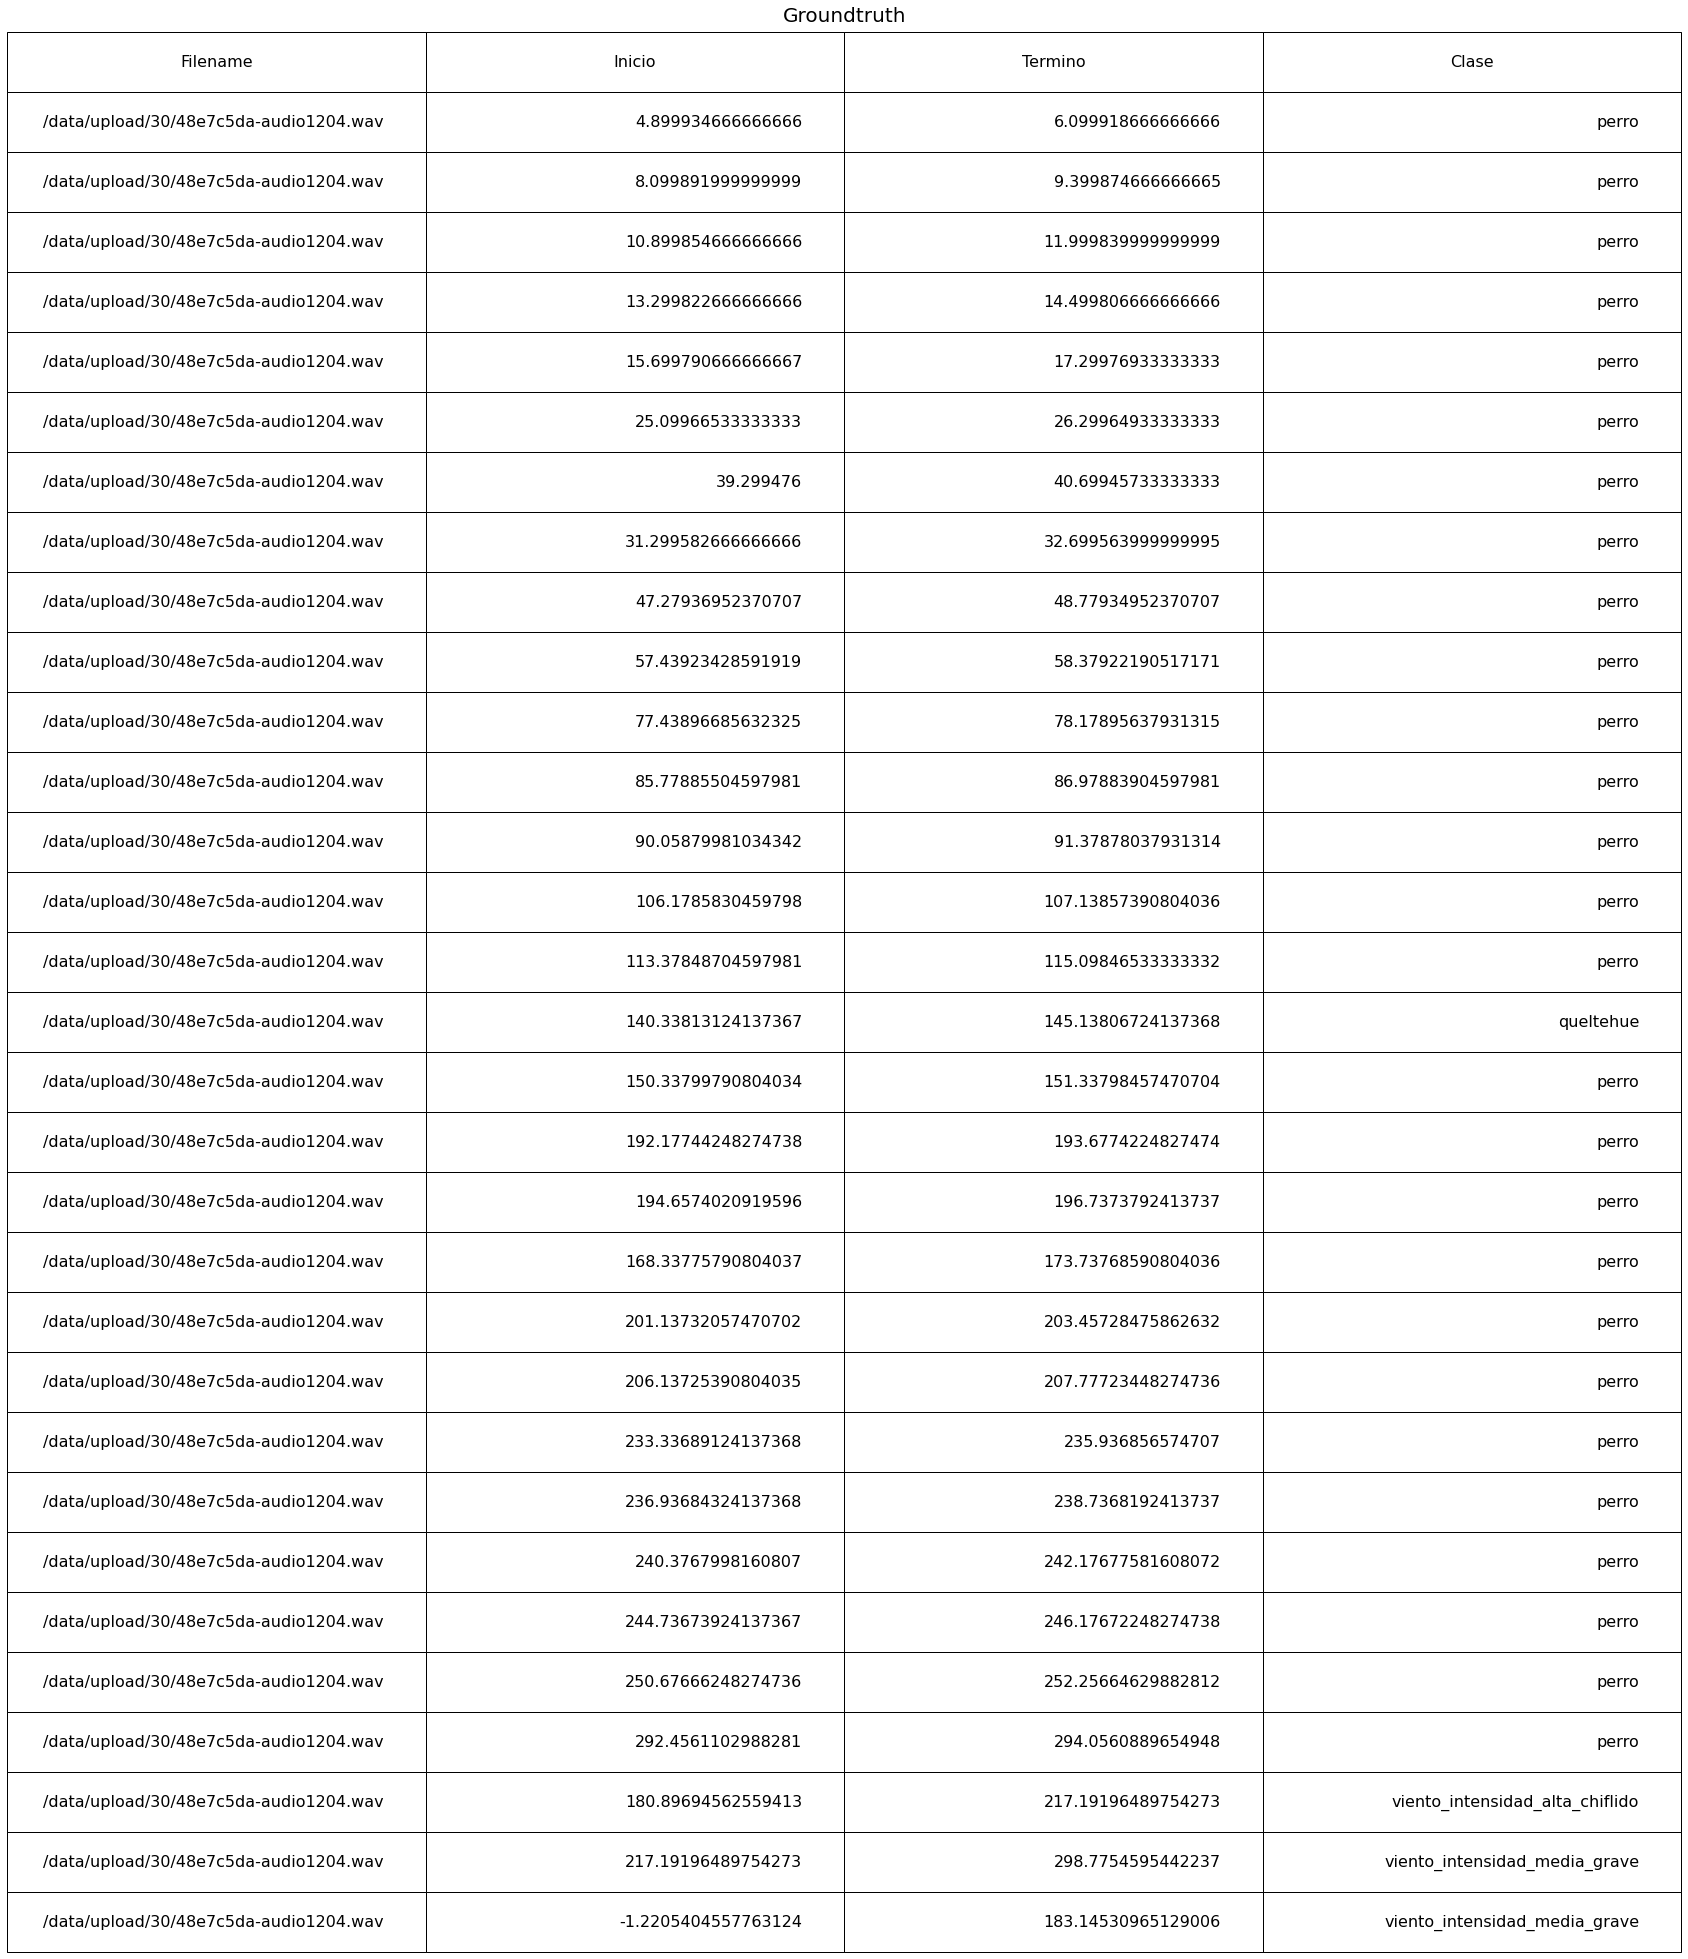

In [5]:
fig,ax=plt.subplots()
plt.title("Groundtruth",size=20)
fig.patch.set_visible(False)
ax.axis("off")
ax.axis("tight")
tabla = ax.table(cellText=groundtruth,colLabels=columnas,loc="upper center")
tabla.scale(5,5)
tabla.set_fontsize(26)

### Conversion de listas a diccionarios

In [6]:
j_son = dict()

In [7]:
print(anotaciones[0].keys())
#('annotations') lista de un solo elemento(diccionario) 
#('results') lista
#('value') diccionario
#'end'=numero, 'start'=numero, 'labels'=lista , objetos

dict_keys(['id', 'completed_by', 'result', 'was_cancelled', 'ground_truth', 'created_at', 'updated_at', 'lead_time', 'prediction', 'result_count', 'task'])


In [8]:
annotations=[]
results=[]
keylist = ['value','end','start','labels']


c = 0
for i in range(len(groundtruth)):
    results_i=dict()
    value_i=dict()
    c+= 1
    results_i["id"] = c
    value_i[keylist[1]] = terminos[i]
    value_i[keylist[2]] = inicios[i]
    value_i[keylist[3]] = [clases[i]]
    results_i[keylist[0]] = value_i
    results.append(results_i)

annot_dict = dict()
annot_dict['result'] = results
annot_dict['ground_truth'] = True

annotations = [annot_dict]

j_son['data'] = dict()
data = dict()
for i in range(len(groundtruth)):
    a = filenames[i]
    data['audio'] = a

j_son['annotations'] = annotations
j_son['data'] = data

print(j_son)

{'data': {'audio': '/data/local-files/?d=label-studio/my-files/audio10.wav'}, 'annotations': [{'result': [{'id': 1, 'value': {'end': 1.4222033022591754, 'start': 1.0115251528710707, 'labels': ['fiofio_a']}}, {'id': 2, 'value': {'end': 8.46153437806444, 'start': 7.9846115313008115, 'labels': ['fiofio_b']}}, {'id': 3, 'value': {'end': 15.080761952904858, 'start': 14.696146753901925, 'labels': ['fiofio_b']}}, {'id': 4, 'value': {'end': 51.6271271415001, 'start': 51.133789407968194, 'labels': ['fiofio_a']}}, {'id': 5, 'value': {'end': 57.88718297645214, 'start': 57.34717816001858, 'labels': ['fiofio_a']}}, {'id': 6, 'value': {'end': 60.68054122442328, 'start': 60.09386932508805, 'labels': ['fiofio_b']}}, {'id': 7, 'value': {'end': 62.013886450185154, 'start': 61.51388199052446, 'labels': ['fiofio_a']}}, {'id': 8, 'value': {'end': 66.07392266263011, 'start': 65.52725112006775, 'labels': ['fiofio_a']}}, {'id': 9, 'value': {'end': 68.57394496093363, 'start': 67.89393889579507, 'labels': ['fio

## Conversion de diccionario a json

In [10]:
out_file = open(r'C:\Users\hakim\Desktop\Clases\Universidad\zProyecto dsp\conversion de json a txt\Json version final\json_fiofio.json', "w")
json.dump(j_son, out_file, indent = 4, sort_keys = False)
out_file.close()

$$
\mathscr{Fin}
$$